# Testing of parallelized plain samplers

In [1]:
from random_walk_metropolis import parallel_rwm, parallel_ada_rwm
from gibbsian_polar_slice_sampling import parallel_gpss
from hit_and_run_uniform_slice_sampling import parallel_hruss
from random_scan_uniform_slice_sampling import parallel_rsuss
from elliptical_slice_sampling import parallel_ngp_ess, ess, gp_ess
import mcmc_utils as mcu
import plotting_functions as pfs
import numpy as np
import numpy.linalg as alg
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
d = 100
n_chains = 10
n_its = int(1e5)
def log_density(x):
    return - alg.norm(x)**3
x_0s = rnd.normal(scale=1/3, size=(n_chains,d))
w = 1.0 # hyperparameter for GPSS, HRUSS, RSUSS
rwm_cov = 0.5 / d # hyperparameter for RWM

### RWM

In [3]:
samples, runtimes = parallel_rwm(log_density, n_chains, n_its, x_0s, rwm_cov)

Checking validity of given arguments...
Preparing for parallel sampling...
Starting parallel sampling...


100%|████████████████████████████████| 100000/100000 [00:01<00:00, 58330.85it/s]


Processing returns and terminating...


Acceptance rate: 0.273


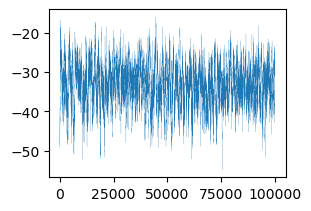

In [4]:
ldvs = np.apply_along_axis(log_density, -1, samples)
flat_ldvs = ldvs.T.reshape(-1)
acc_rate = np.mean(flat_ldvs[1:] != flat_ldvs[:-1])
print("Acceptance rate: {:.3f}".format(acc_rate))
pfs.trace_plot(ldvs[:,0], lw=0.1)

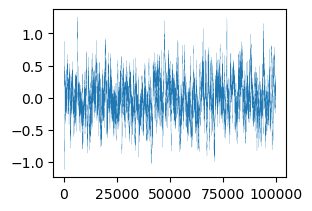

In [5]:
pfs.trace_plot(samples[:,0,0], lw=0.1)

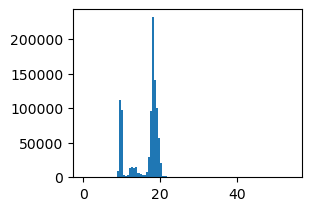

In [6]:
pfs.plot_runtime_hist(runtimes)

In [7]:
np.mean(1e6 * runtimes), np.std(1e6 * runtimes)

(16.39229356226335, 11.637874500082871)

### Adaptive RWM
(Of course this technically does not belong into a testing notebook for plain samplers.)

In [8]:
samples, runtimes, ldvs, means, covs = parallel_ada_rwm(log_density, n_chains, n_its, x_0s)

Checking validity of given arguments...
Preparing for parallel sampling...
Starting parallel sampling...


100%|█████████████████████████████████| 100000/100000 [00:32<00:00, 3034.11it/s]


Processing returns and terminating...


Acceptance rate: 0.511


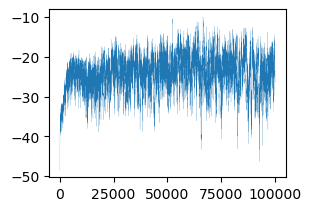

In [9]:
flat_ldvs = ldvs.T.reshape(-1)
acc_rate = np.mean(flat_ldvs[1:] != flat_ldvs[:-1])
print("Acceptance rate: {:.3f}".format(acc_rate))
pfs.trace_plot(ldvs[:,0], lw=0.1)

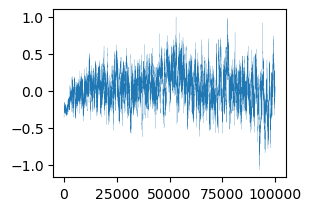

In [10]:
pfs.trace_plot(samples[:,0,0], lw=0.1)

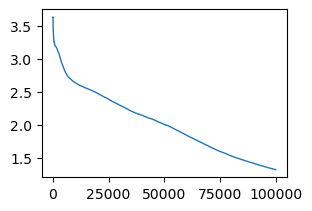

In [11]:
mean_norms = mcu.get_radii(means)
pfs.trace_plot(mean_norms[:,0], lw=1)

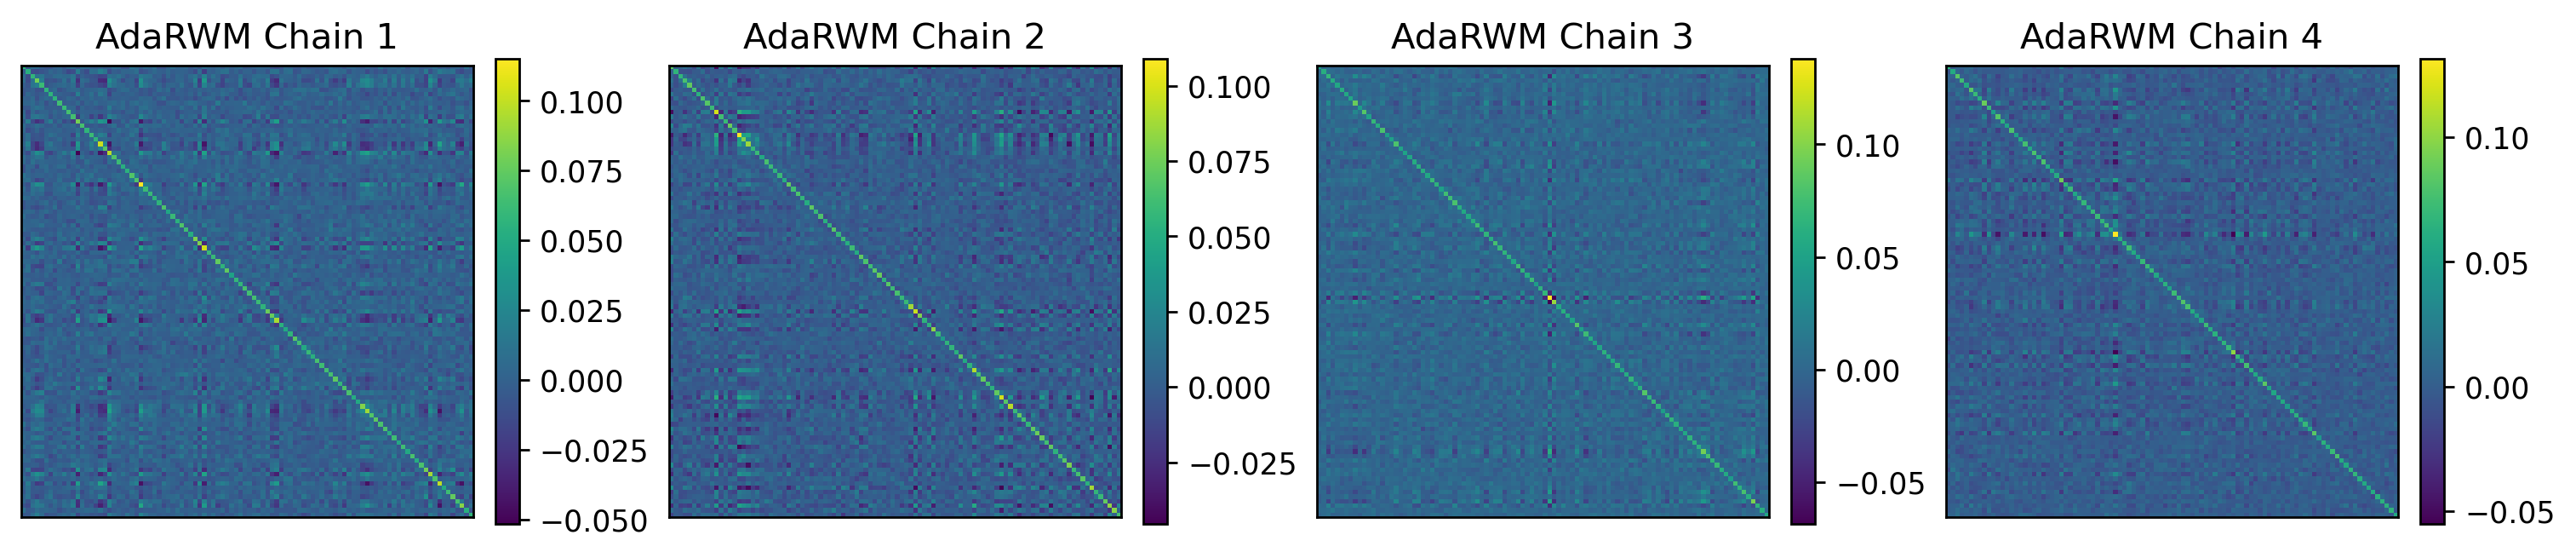

In [12]:
ncov = 4
titles = ["AdaRWM Chain {}".format(i+1) for i in range(ncov)]
pfs.plot_covs_row(covs[:ncov], titles)

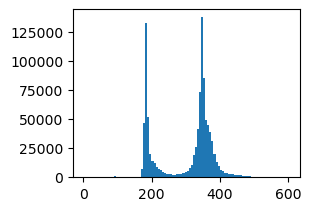

In [13]:
pfs.plot_runtime_hist(runtimes)

In [14]:
np.mean(1e6 * runtimes), np.std(1e6 * runtimes)

(303.3041983842552, 89.64292773010361)

### GPSS

In [15]:
samples, tde_cnts, runtimes = parallel_gpss(log_density, n_chains, n_its, x_0s, w)

Checking validity of given arguments...
Preparing for parallel sampling...
Starting parallel sampling...


100%|█████████████████████████████████| 100000/100000 [00:10<00:00, 9584.78it/s]


Processing returns and terminating...


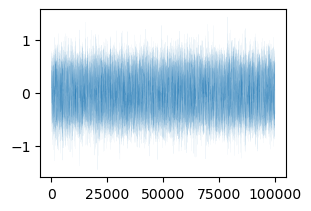

In [16]:
pfs.trace_plot(samples[:,7,13])

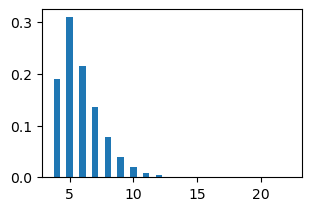

In [17]:
pfs.plot_tde_distr(tde_cnts[1:])

In [18]:
np.mean(tde_cnts), np.std(tde_cnts)

(5.879649203507965, 1.6229895871473086)

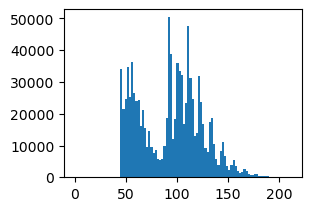

In [19]:
pfs.plot_runtime_hist(runtimes)

In [20]:
np.mean(1e6 * runtimes), np.std(1e6 * runtimes)

(94.3912155498196, 35.445486192150874)

### HRUSS

In [21]:
samples, tde_cnts, runtimes = parallel_hruss(log_density, n_chains, n_its, x_0s, w)

Checking validity of given arguments...
Preparing for parallel sampling...
Starting parallel sampling...


100%|████████████████████████████████| 100000/100000 [00:06<00:00, 16192.41it/s]


Processing returns and terminating...


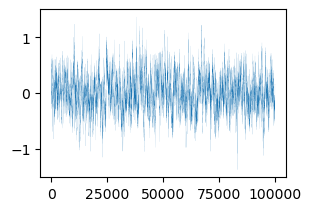

In [22]:
pfs.trace_plot(samples[:,7,13], lw=0.05)

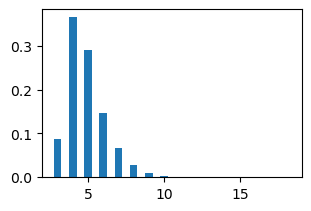

In [23]:
pfs.plot_tde_distr(tde_cnts[1:])

In [24]:
np.mean(tde_cnts), np.std(tde_cnts)

(4.893961060389396, 1.3009637603625372)

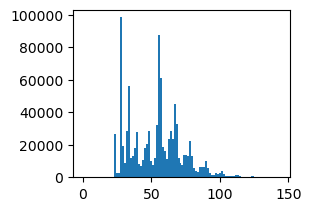

In [25]:
pfs.plot_runtime_hist(runtimes)

In [26]:
np.mean(1e6 * runtimes), np.std(1e6 * runtimes)

(54.01988225982608, 23.244544483057137)

### RSUSS

In [27]:
samples, tde_cnts, runtimes = parallel_rsuss(log_density, n_chains, n_its, x_0s, w)

Checking validity of given arguments...
Preparing for parallel sampling...
Starting parallel sampling...


100%|████████████████████████████████| 100000/100000 [00:05<00:00, 17879.64it/s]


Processing returns and terminating...


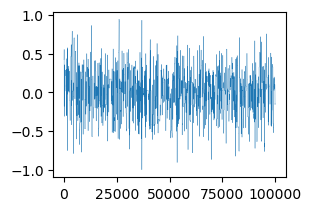

In [28]:
pfs.trace_plot(samples[:,7,13], lw=0.25)

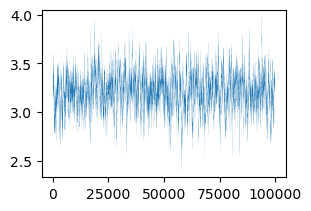

In [29]:
radii = mcu.get_radii(samples[:,7])
pfs.trace_plot(radii, lw=0.05)

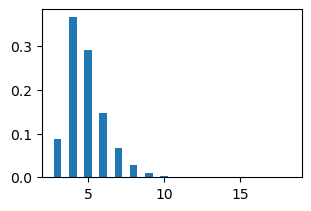

In [30]:
pfs.plot_tde_distr(tde_cnts[1:])

In [31]:
np.mean(tde_cnts), np.std(tde_cnts)

(4.893054069459305, 1.29995944345234)

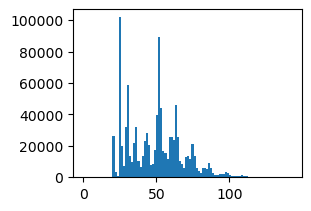

In [32]:
pfs.plot_runtime_hist(runtimes)

In [33]:
np.mean(1e6 * runtimes), np.std(1e6 * runtimes)

(49.911306278248865, 23.28156172679208)

### ESS
#### Parallel Naive General Purpose ESS

In [34]:
samples, tde_cnts, runtimes = parallel_ngp_ess(log_density, n_chains, n_its, x_0s)

Checking validity of given arguments...
Preparing for parallel sampling...
Starting parallel sampling...


100%|█████████████████████████████████| 100000/100000 [00:25<00:00, 3908.82it/s]


Processing returns and terminating...


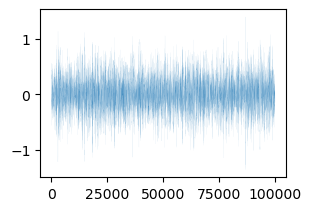

In [35]:
pfs.trace_plot(samples[:,7,13])

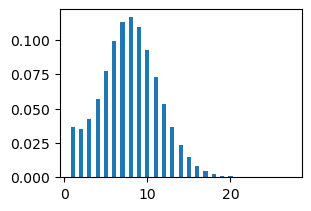

In [36]:
pfs.plot_tde_distr(tde_cnts[1:])

In [37]:
np.mean(tde_cnts), np.std(tde_cnts)

(7.868118318816812, 3.497476193606364)

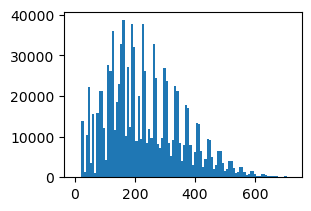

In [38]:
pfs.plot_runtime_hist(runtimes)

In [39]:
np.mean(1e6 * runtimes), np.std(1e6 * runtimes)

(235.2840131457389, 129.31046099135483)

#### General Purpose ESS

In [40]:
d_gpess = 10
mean_gpess = np.arange(d_gpess)
cov_gpess = d - np.arange(d_gpess)
x_0_gpess = rnd.normal(scale=1/3, size=d_gpess)

In [41]:
samples, gen, tde_cnts, runtimes = gp_ess(log_density, mean_gpess, cov_gpess, n_its, x_0_gpess, rnd)

100%|█████████████████████████████████| 100000/100000 [00:12<00:00, 7822.28it/s]


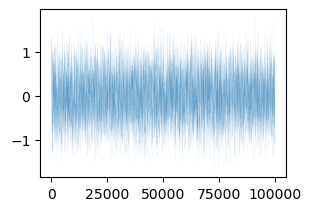

In [42]:
pfs.trace_plot(samples[:,0])

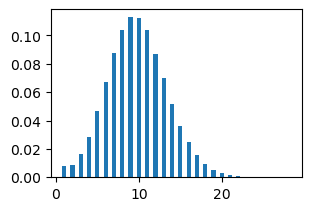

In [43]:
pfs.plot_tde_distr(tde_cnts[1:])

In [44]:
np.mean(tde_cnts), np.std(tde_cnts)

(9.811071889281108, 3.5661307658519044)

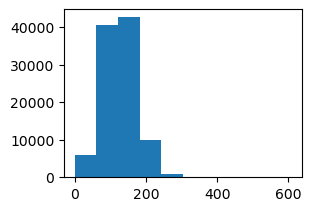

In [45]:
pfs.plot_runtime_hist(runtimes)

In [46]:
np.mean(1e6 * runtimes), np.std(1e6 * runtimes)

(127.84832898436153, 48.894662950267524)

#### Gaussian Prior ESS

In [47]:
d_ess = 10
mean_ess = np.arange(d_ess)
cov_ess = d - np.arange(d_ess)
log_likelihood = lambda x: - alg.norm(x)
x_0_ess = rnd.normal(scale=1/3, size=d_ess)

In [48]:
samples, gen, tde_cnts, runtimes = ess(mean_ess, cov_ess, log_likelihood, n_its, x_0_ess, rnd)

100%|████████████████████████████████| 100000/100000 [00:07<00:00, 14278.98it/s]


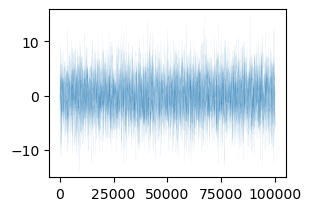

In [49]:
pfs.trace_plot(samples[:,0])

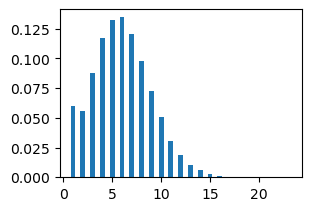

In [50]:
pfs.plot_tde_distr(tde_cnts[1:])

In [51]:
np.mean(tde_cnts), np.std(tde_cnts)

(6.023379766202338, 2.9406371601401475)

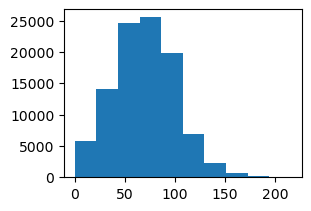

In [52]:
pfs.plot_runtime_hist(runtimes)

In [53]:
np.mean(1e6 * runtimes), np.std(1e6 * runtimes)

(70.03823813995747, 33.7858075059332)